## Multiple Linear Regression Project

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                         attribute "MEDV"), 1 binary-valued attribute.

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    
    11. PTRATIO  pupil-teacher ratio by town
    
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    
    13. LSTAT    % lower status of the population
    
    14. MEDV     Median value of owner-occupied homes in $1000's

8. Missing Attribute Values:  None.

In [1]:
#Let's import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
# for warnings messages
import warnings
warnings.simplefilter(action='ignore', category=Warning)

## Understanding the dataset

In [27]:
#Read the file
data=pd.read_csv(r"C:\Users\Lenovo\Desktop\Machine Learning\boston housing data.csv")

In [28]:
#First 5 rows of the data
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [29]:
#Last 5 rows of the data
data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [30]:
#Some statistical information about numerical columns
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [31]:
#Information about columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [98]:
#Let's check duplicates values in dataset
data.duplicated().sum()

0

In [32]:
#Shape of the dataset

data.shape

(506, 14)

**Distribution of Medv in Itself:**

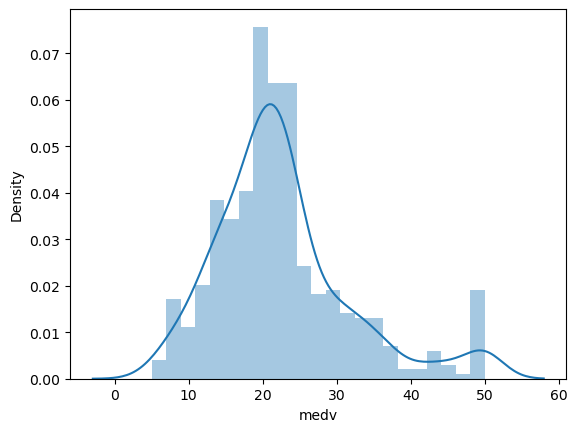

In [41]:
sns.distplot(data.medv)
plt.show()

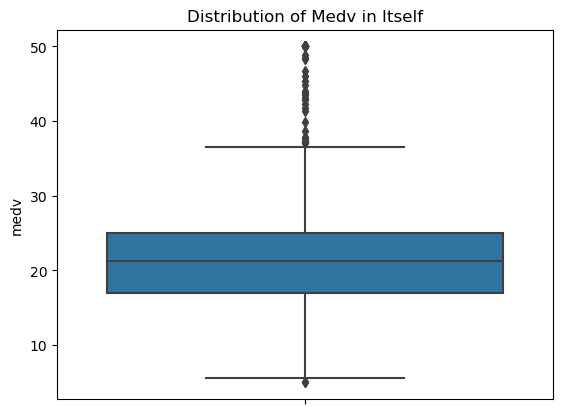

In [42]:
#Let's check it in boxplot
sns.boxplot(y=data.medv)
plt.title('Distribution of Medv in Itself')
plt.show()

In [49]:
columns=data.columns

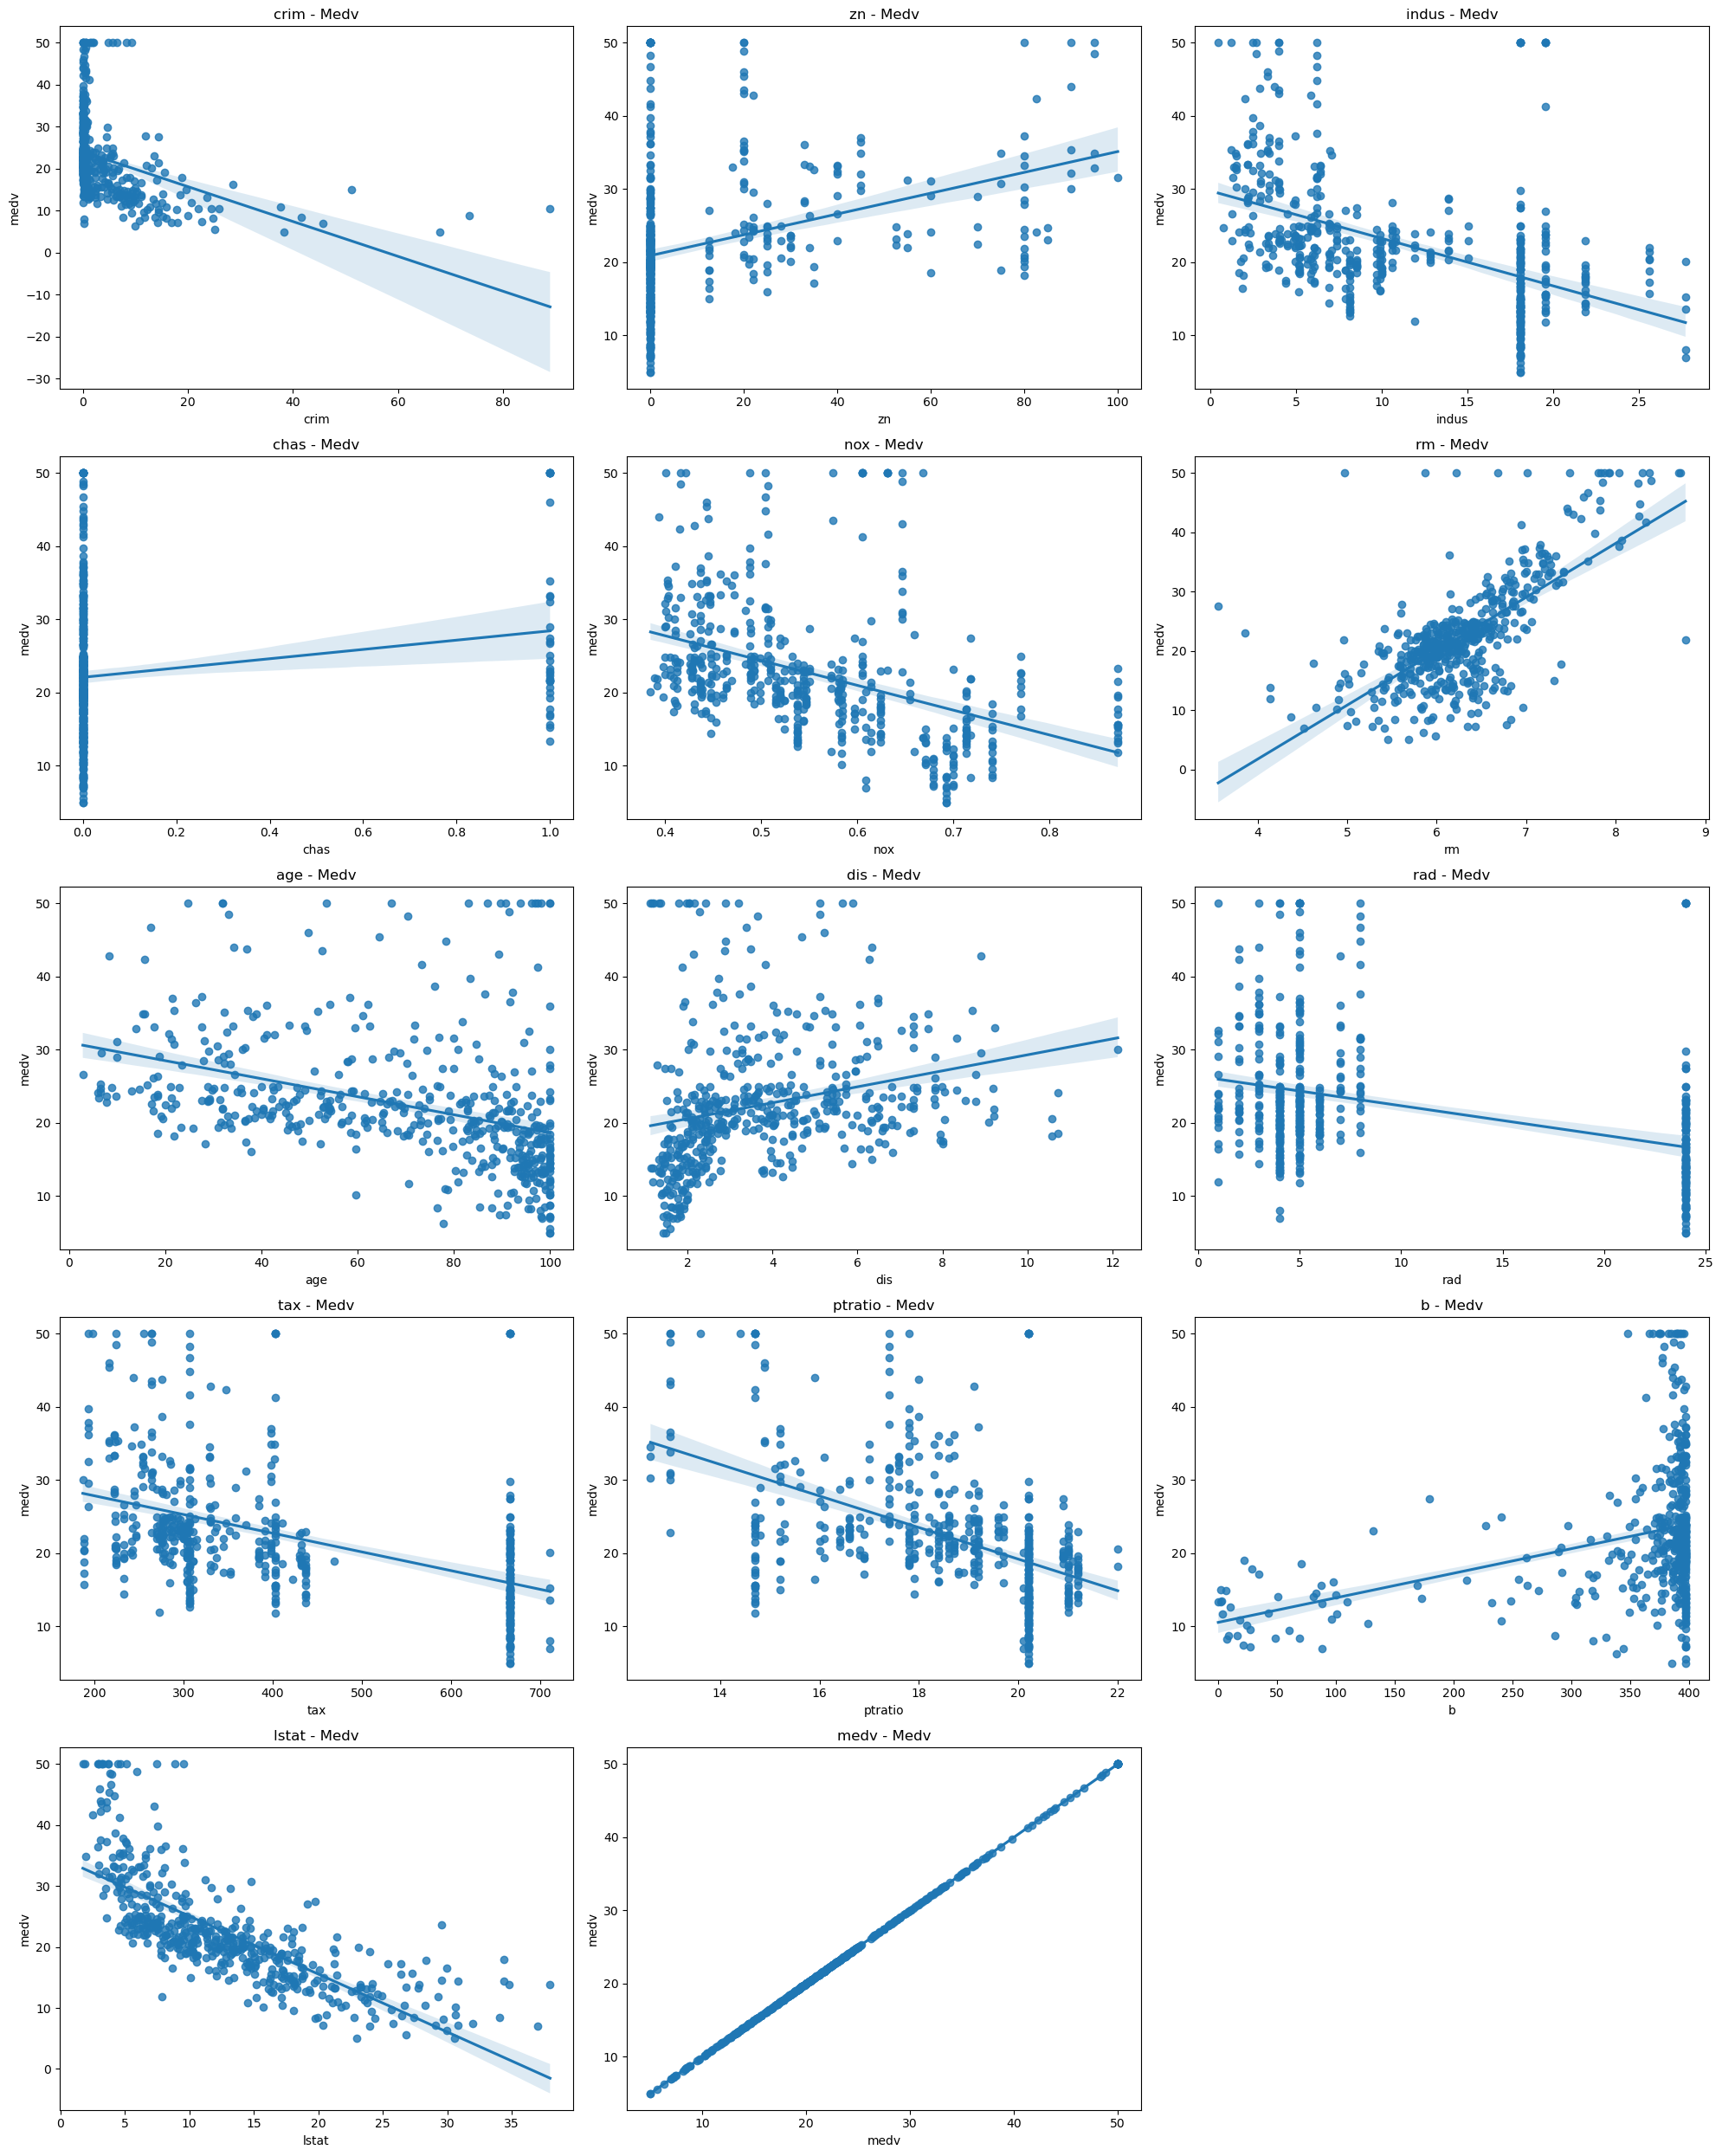

In [51]:
# let's see the relationship with the regression lines

plt.figure(figsize=(20,25))

for i in range(len(columns)):
    plt.subplot(5,3,i+1)
    plt.title(columns[i] + ' - Medv')
    sns.regplot(x=eval('data' + '.' + columns[i]), y=data.medv)
    
plt.tight_layout()

**We need to delete some variables because they have almost no effect**

Ineffective variables:

* zn
* chas
* rad

In [52]:
data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [57]:
#Let's create columns for our new dataset
df=data[['crim', 'indus','nox', 'rm', 'age', 'dis','tax',
       'ptratio', 'b', 'lstat', 'medv']]

In [58]:
#First 5 rows of our new dataset
df.head()

,crim,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2


## Train Test Split
Let's split the dataset Train and Test..

%70---Train Data

%30---Test Data

In [60]:
X_train, X_test = train_test_split(df, test_size=0.30, random_state=100)

In [61]:
X_train.head()

,crim,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
463,5.82115,18.10,0.713,6.513,89.9,2.8016,666,20.2,393.82,10.29,20.2
75,0.09512,12.83,0.437,6.286,45.0,4.5026,398,18.7,383.23,8.94,21.4
478,10.23300,18.10,0.614,6.185,96.7,2.1705,666,20.2,379.70,18.03,14.6
199,0.03150,1.47,0.403,6.975,15.3,7.6534,402,17.0,396.90,4.56,34.9
84,0.05059,4.49,0.449,6.389,48.0,4.7794,247,18.5,396.90,9.62,23.9


In [62]:
X_test.head()

,crim,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
198,0.03768,1.52,0.404,7.274,38.3,7.3090,329,12.6,392.20,6.62,34.6
229,0.44178,6.20,0.504,6.552,21.4,3.3751,307,17.4,380.34,3.76,31.5
502,0.04527,11.93,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
31,1.35472,8.14,0.538,6.072,100.0,4.1750,307,21.0,376.73,13.04,14.5
315,0.25356,9.90,0.544,5.705,77.7,3.9450,304,18.4,396.42,11.50,16.2


## Scaling

Having different sizes of variables is a problem. For this, they are all sized within themselves.

Min-Max Scaling -> resizes from 0 to 1:
    $$X_{scaled} = (X - X_{min}) / (X_{max} - X_{min}) $$

$X_{minScaled} = 0$



$X_{maxScaled} = 1$

In [63]:
scaler=MinMaxScaler()

In [64]:
scale_cols=['crim','indus','nox', 'rm', 'age', 'dis','tax',
       'ptratio', 'b', 'lstat']

In [65]:
X_train[scale_cols] = scaler.fit_transform(X_train[scale_cols])

In [66]:
X_train.head()

,crim,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
463,0.079083,0.636638,0.674897,0.565626,0.892553,0.173879,0.913958,0.808511,0.992234,0.236203,20.2
75,0.001208,0.437995,0.106996,0.522131,0.414894,0.351561,0.401530,0.648936,0.965530,0.198951,21.4
478,0.139086,0.636638,0.471193,0.502778,0.964894,0.107957,0.913958,0.808511,0.956629,0.449779,14.6
199,0.000342,0.009800,0.037037,0.654148,0.098936,0.680685,0.409178,0.468085,1.000000,0.078091,34.9
84,0.000602,0.123634,0.131687,0.541866,0.446809,0.380475,0.112811,0.627660,1.000000,0.217715,23.9


In [67]:
y_train=X_train.pop('medv')

In [68]:
y_train

463    20.2
75     21.4
478    14.6
199    34.9
84     23.9
       ... 
343    23.9
359    22.6
323    18.5
280    45.4
8      16.5
Name: medv, Length: 354, dtype: float64

## Let's build the model

In [69]:
Lr_model=LinearRegression()

In [70]:
Lr_model.fit(X_train,y_train)

LinearRegression()

## RFE (Recursive Feature Elimination)

In [71]:
#Prepare RFE
rfe = RFE(Lr_model, n_features_to_select=8)

In [72]:
#Train RFE
rfe = rfe.fit(X_train,y_train)

In [73]:
rfe.support_

array([ True,  True,  True,  True, False,  True, False,  True,  True,
        True])

In [74]:
rfe.ranking_

array([1, 1, 1, 1, 2, 1, 3, 1, 1, 1])

In [75]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('crim', True, 1),
 ('indus', True, 1),
 ('nox', True, 1),
 ('rm', True, 1),
 ('age', False, 2),
 ('dis', True, 1),
 ('tax', False, 3),
 ('ptratio', True, 1),
 ('b', True, 1),
 ('lstat', True, 1)]

In [76]:
#Selected variables
X_train.columns[rfe.support_]

Index(['crim', 'indus', 'nox', 'rm', 'dis', 'ptratio', 'b', 'lstat'], dtype='object')

In [77]:
#Important variables which we know
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [78]:
X_train_rfe

,crim,indus,nox,rm,dis,ptratio,b,lstat
463,0.079083,0.636638,0.674897,0.565626,0.173879,0.808511,0.992234,0.236203
75,0.001208,0.437995,0.106996,0.522131,0.351561,0.648936,0.965530,0.198951
478,0.139086,0.636638,0.471193,0.502778,0.107957,0.808511,0.956629,0.449779
199,0.000342,0.009800,0.037037,0.654148,0.680685,0.468085,1.000000,0.078091
84,0.000602,0.123634,0.131687,0.541866,0.380475,0.627660,1.000000,0.217715
...,...,...,...,...,...,...,...,...
343,0.000260,0.096871,0.203704,0.600690,0.479991,0.531915,1.000000,0.150386
359,0.057869,0.636638,0.792181,0.488791,0.143326,0.808511,0.984467,0.301876
323,0.003775,0.232567,0.222222,0.411381,0.374385,0.744681,0.985451,0.276214
280,0.000401,0.079910,0.119136,0.816057,0.371627,0.244681,0.975818,0.056015


## OLS Analysis

In [80]:
X_train_rfemodel = X_train_rfe.copy()

In [81]:
X_train_rfemodel = sm.add_constant(X_train_rfemodel)

In [82]:
Lr_model= sm.OLS(y_train, X_train_rfemodel).fit()

In [83]:
print(Lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     116.6
Date:                Sat, 27 May 2023   Prob (F-statistic):           2.71e-93
Time:                        02:53:30   Log-Likelihood:                -1039.7
No. Observations:                 354   AIC:                             2097.
Df Residuals:                     345   BIC:                             2132.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.7974      2.682      8.874      0.0

What we see here is that the p-value of the variable named **crim** is greater than 0.05.

So it's unimportant, we can subtract it.

In [84]:
X_train_rfemodel = X_train_rfemodel.drop(['crim'],axis=1)

In [85]:
#We will run an OLS again.

#Let's make a function for this 

def train_ols(X,y):
    X = sm.add_constant(X)
    lr = sm.OLS(y,X).fit()
    print(lr.summary())

In [86]:
# let's run now

train_ols(X_train_rfemodel, y_train)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     133.4
Date:                Sat, 27 May 2023   Prob (F-statistic):           2.97e-94
Time:                        02:58:43   Log-Likelihood:                -1040.0
No. Observations:                 354   AIC:                             2096.
Df Residuals:                     346   BIC:                             2127.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.7393      2.679      8.862      0.0

What we see here is that the p-value of the variable named **indus** is greater than 0.05.

So it's unimportant, we can subtract it.

In [87]:
X_train_rfemodel = X_train_rfemodel.drop(['indus'],axis=1)

In [88]:
# let's run OLS again

train_ols(X_train_rfemodel, y_train)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     155.0
Date:                Sat, 27 May 2023   Prob (F-statistic):           5.34e-95
Time:                        03:00:09   Log-Likelihood:                -1040.9
No. Observations:                 354   AIC:                             2096.
Df Residuals:                     347   BIC:                             2123.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.1864      2.648      8.756      0.0

## Order of Importance of Coefficients

In [89]:
X_train.columns

Index(['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b',
       'lstat'],
      dtype='object')

In [90]:
X_train_new=X_train[['nox', 'rm','dis', 'ptratio', 'b',
       'lstat']]

In [91]:
X_train_new.columns

Index(['nox', 'rm', 'dis', 'ptratio', 'b', 'lstat'], dtype='object')

In [92]:
#First 5 rows of X_train_new 
X_train_new.head()

,nox,rm,dis,ptratio,b,lstat
463,0.674897,0.565626,0.173879,0.808511,0.992234,0.236203
75,0.106996,0.522131,0.351561,0.648936,0.965530,0.198951
478,0.471193,0.502778,0.107957,0.808511,0.956629,0.449779
199,0.037037,0.654148,0.680685,0.468085,1.000000,0.078091
84,0.131687,0.541866,0.380475,0.627660,1.000000,0.217715


In [93]:
new_lr=LinearRegression()

In [94]:
new_lr.fit(X_train_new,y_train)

LinearRegression()

In [95]:
new_lr.coef_

array([ -7.55122088,  22.76916597, -10.20896063,  -9.54444174,
         4.42056687, -16.93218068])

**The variables that affect Median value of owner-occupied homes in $1000's**
* nox
* rm
* dis
* ptratio
* b
* lstat